# Analyse cupy logs

## array() timings in cupy/cupy/core/core.pyx

In [90]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os.path
import datetime
from cycler import cycler
import pandas as pd

In [91]:
!ls cupy*.log

cupy_logs128.log


In [92]:
filename="cupy_logs128.log"

In [93]:
df = pd.read_csv(filename,header=0, skiprows=[0])
# Convert to s
df["time_cuda"] = df["time_cuda"]/1000
df

,timestamp,timedelta,time_cuda,shape
0,2018-02-26 06:10:51.629446,0.001051,1.060544e-03,(512:)
1,2018-02-26 06:10:51.629765,0.000065,6.822400e-05,(512:)
2,2018-02-26 06:10:51.629937,0.000063,6.569600e-05,(512:)
3,2018-02-26 06:10:51.630053,0.000047,4.972800e-05,(512:)
4,2018-02-26 06:10:51.630165,0.000047,4.883200e-05,(512:)
5,2018-02-26 06:10:51.630273,0.000045,4.777600e-05,(512:)
6,2018-02-26 06:10:51.630420,0.000047,5.036800e-05,(512:)
7,2018-02-26 06:10:51.630527,0.000045,4.716800e-05,(512:)
8,2018-02-26 06:10:51.630635,0.000043,4.662400e-05,(512:)
9,2018-02-26 06:10:51.630741,0.000043,4.681600e-05,(512:)


In [94]:
# Parse date from readable format to seconds
start = 0
def parseTime(date_time):
    global start
    dt_obj = datetime.datetime.strptime(date_time, "%Y-%m-%d %H:%M:%S.%f")
    seconds = 0
    if start == 0:
        start = dt_obj
    else:
        seconds = (dt_obj - start).total_seconds()
    return seconds

In [95]:
df["sec"] = df.timestamp.apply(parseTime)
df.iloc[:5]

,timestamp,timedelta,time_cuda,shape,sec
0,2018-02-26 06:10:51.629446,0.001051,0.001061,(512:),0.000000
1,2018-02-26 06:10:51.629765,0.000065,0.000068,(512:),0.000319
2,2018-02-26 06:10:51.629937,0.000063,0.000066,(512:),0.000491
3,2018-02-26 06:10:51.630053,0.000047,0.000050,(512:),0.000607
4,2018-02-26 06:10:51.630165,0.000047,0.000049,(512:),0.000719


In [96]:
df.set_index("sec", drop=True, inplace=True)
df = df.drop(columns=['timestamp'])
df.iloc[:5]

,timedelta,time_cuda,shape
sec,,,
0.000000,0.001051,0.001061,(512:)
0.000319,0.000065,0.000068,(512:)
0.000491,0.000063,0.000066,(512:)
0.000607,0.000047,0.000050,(512:)
0.000719,0.000047,0.000049,(512:)


In [100]:
gr = df.groupby(by="shape").agg({"timedelta": [np.mean, np.count_nonzero, np.sum]})
grr = gr.reset_index()
grr.columns=["shape","mean","count","sum"]
print "time:",grr["sum"].sum(),"(ms)"
print "calls:",grr["count"].sum()
grr

time: 0.125195 (ms)
calls: 1494.0


,shape,mean,count,sum
0,(),0.000004,470.0,0.001712
1,(128: 3: 32: 32),0.000186,469.0,0.087004
2,(128:),0.000064,481.0,0.030557
3,(16: 3: 32: 32),0.000755,1.0,0.000755
4,(16:),0.000050,1.0,0.000050
5,(256:),0.000049,18.0,0.000877
6,(512:),0.000069,42.0,0.002896
7,(64:),0.000112,12.0,0.001344


In [99]:
gr2 = df.groupby(by="shape").agg({"time_cuda": [np.mean, np.count_nonzero, np.sum]})
grr2 = gr2.reset_index()
grr2.columns=["shape","mean","count","sum"]
print "time:",grr2["sum"].sum(),"(ms)"
print "calls:",grr2["count"].sum()
grr2

time: 0.12256134419 (ms)
calls: 1494.0


,shape,mean,count,sum
0,(),0.000001,470.0,0.000501
1,(128: 3: 32: 32),0.000167,469.0,0.078532
2,(128:),0.000078,481.0,0.037417
3,(16: 3: 32: 32),0.000765,1.0,0.000765
4,(16:),0.000053,1.0,0.000053
5,(256:),0.000052,18.0,0.000929
6,(512:),0.000072,42.0,0.003025
7,(64:),0.000112,12.0,0.001340


In [69]:
grr.set_index("shape",inplace=True)

KeyError: 'shape'

In [36]:
grr.sort_values("sum",ascending=False)

,mean,count,sum
shape,,,
(128: 3: 32: 32),0.000168,469.0,0.078611
(128:),0.000076,481.0,0.036481
(512:),0.000088,42.0,0.003679
(64:),0.000113,12.0,0.001360
(256:),0.000049,18.0,0.000875
(16: 3: 32: 32),0.000759,1.0,0.000759
(),0.000001,470.0,0.000496
(16:),0.000050,1.0,0.000050


In [38]:
print grr["sum"].sum(),"(s)"
print grr["count"].sum(),"calls"

0.122311135731 (s)
1494.0 calls


In [39]:
gr2 = df.groupby(by="shape").agg({"timestamp": [np.mean, np.count_nonzero, np.sum]})
grr2 = gr2.reset_index()
grr2.columns=["shape","mean","count","sum"]
grr2

,shape,mean,count,sum
0,(),0.000011,470.0,0.005157
1,(128: 3: 32: 32),0.000192,469.0,0.090001
2,(128:),0.000072,481.0,0.034761
3,(16: 3: 32: 32),0.000757,1.0,0.000757
4,(16:),0.000054,1.0,0.000054
5,(256:),0.000051,18.0,0.000924
6,(512:),0.002265,42.0,0.095111
7,(64:),0.000116,12.0,0.001395


In [41]:
grr2.set_index("shape",inplace=True)
grr2.sort_values("sum",ascending=False)

,mean,count,sum
shape,,,
(512:),0.002265,42.0,0.095111
(128: 3: 32: 32),0.000192,469.0,0.090001
(128:),0.000072,481.0,0.034761
(),0.000011,470.0,0.005157
(64:),0.000116,12.0,0.001395
(256:),0.000051,18.0,0.000924
(16: 3: 32: 32),0.000757,1.0,0.000757
(16:),0.000054,1.0,0.000054


In [42]:
print grr2["sum"].sum(),"(s)"
print grr2["count"].sum(),"calls"

0.22816 (s)
1494.0 calls


In [43]:
pv = df.pivot(columns="shape", values="time_delta").fillna(0)

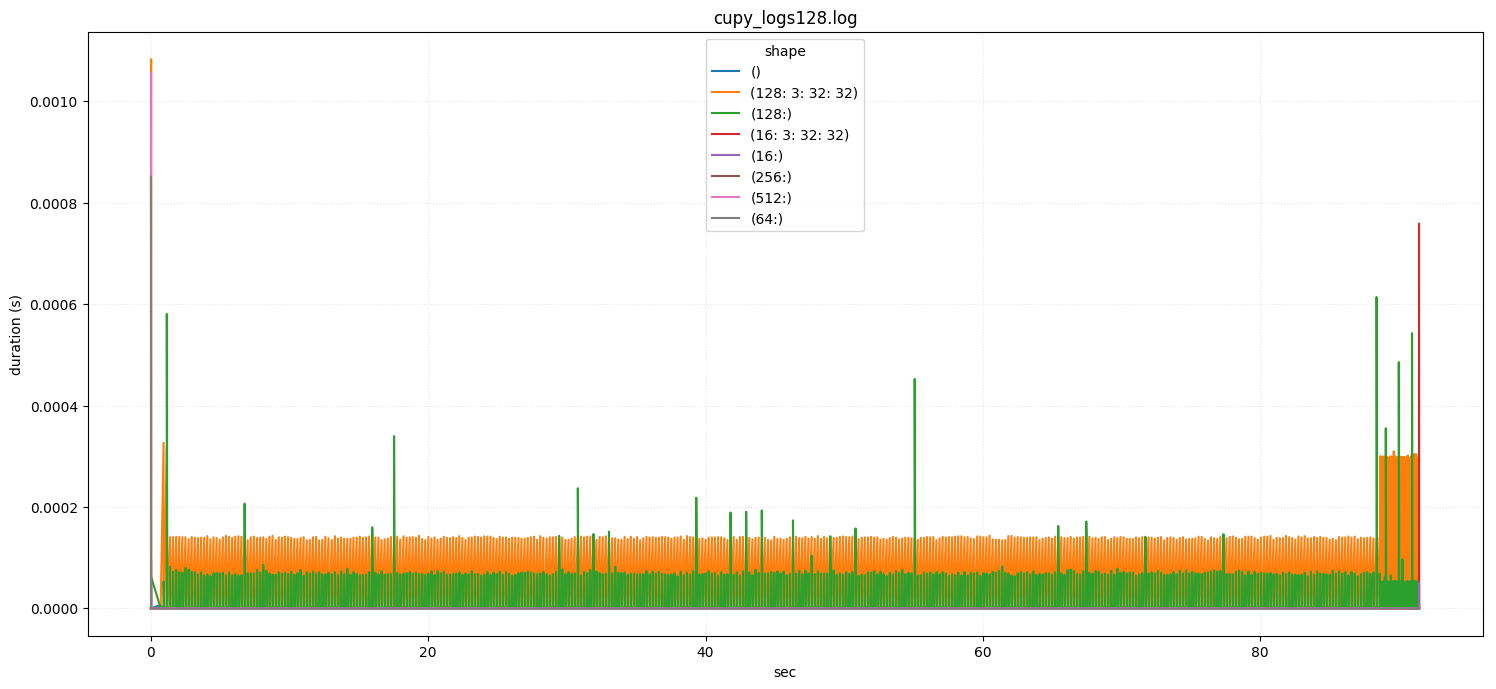

In [45]:
ax = pv.plot(figsize=(18,8))
ax.set_title(filename)
ax.set_ylabel("duration (s)")
ax.grid('on', alpha=0.3, ls=":")


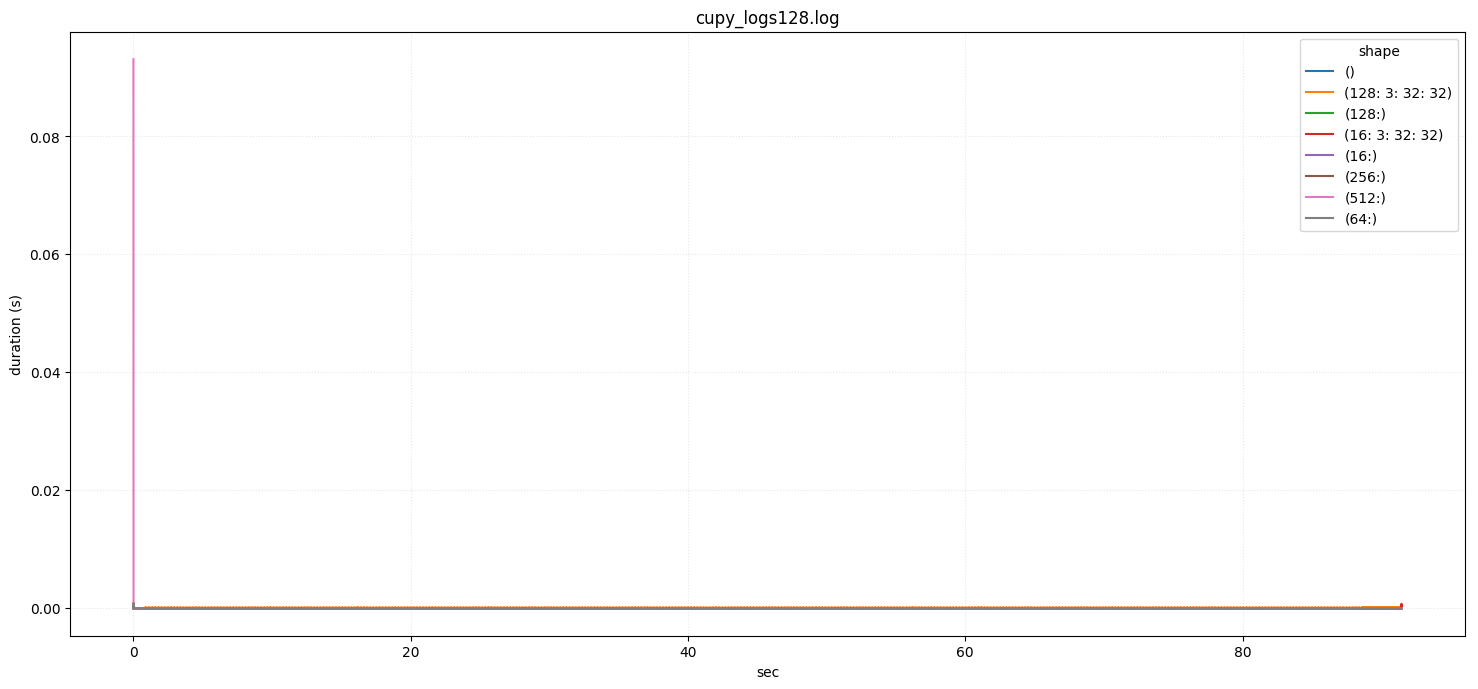

In [46]:
pv = df.pivot(columns="shape", values="timestamp").fillna(0)
ax = pv.plot(figsize=(18,8))
ax.set_title(filename)
ax.set_ylabel("duration (s)")
ax.grid('on', alpha=0.3, ls=":")